<a href="https://colab.research.google.com/github/tishayreni/Python-Prep/blob/main/Sesion-05/Reto-01/bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Reto 1: Bootstrap

### 1. Objetivos:
    - Practicar la aplicación del algoritmo de boostrap
    - Practicar graficar los resultados del boostrap

---
    
### 2. Desarrollo:

En este Reto vamos a aplicar la técnica de bootstrap para explorar distribuciones muestrales de estadísticas. Para este Reto puedes elegir cualquiera de los datasets que vienen incluidos en este módulo. Ha llegado el momento de que te dejes guiar por tu curiosidad. Puedes ver una lista de todo lo que hay disponible [acá](../../Datasets/Readme.md).

Elige un dataset que tenga alguna variable numérica que te parezca interesante. Ahora, vamos a realizar algunos análisis sobre esa variable. Recuerda escribir tu análisis de manera ordenada, ya que si lo deseas habrá oportunidad de presentar tus hallazgos al grupo. Lleva a cabo los siguientes pasos:

1. Primero saca tus estimados de locación y dispersión.
2. Después, grafica tu variable usando un histograma y un boxplot, para que tengas una idea más detallada de su distribución.
3. Si consideras que hay valores atípicos, lidia con ellos de la manera que te parezca más adecuada.
3. Ahora vamos a ver qué tanta incertidumbre y sesgo hay en tus hallazgos. Vamos a aplicar la técnica de bootstrap 3 veces:

  a) Realiza 100 000 remuestreos, cada uno de 5 elementos. Obtén la medida estadística que te interese de cada muestra y guarda los resultados en una lista.
  
  b) Repite el mismo proceso, pero esta vez con remuestreos con longitud de 20% del total de los datos.
  
  c) Repite una vez más, pero esta vez cada nueva muestra tendrá una longitud de 90% de la original.
  
4. Grafica cada una de las listas resultantes en un histograma.
5. Obtén la asimetría y curtosis de cada una y compáralas entre ellas. ¿Cuál es más similar a una distribución normal? ¿Qué diferencias tienen entre ellas?
6. Comparte tus hallazgos con tus compañeros.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
df = pd.read_csv('/content/drive/MyDrive/principal (1).csv')

In [18]:
df.head ()

,SEXO,CODIGO_SEXO,TIPO_DONANTE,MUERTE,ENTIDAD_FEDERATIVA,CODIGO_ENTIDAD_FEDERATIVA,ESTABLECIMIENTO,INSTITUCION,EDAD_ANIOS,FECHA_PROCURACION,...,PULMON_DERECHO,CORAZON,HIGADO,PANCREAS,INTESTINO,CORNEA_IZQUIERDA,CORNEA_DERECHA,PIEL,HUESOS,CORAZON_TEJIDOS
0,FEMENINO,2.0,CADÁVER,PARO CARDIORESPIRATORIO,NUEVO LEÓN,19,U.M.A.E. HOSPITAL DE ESPECIALIDADES No. 25,IMSS,49.0,2007-06-11,...,0,0,0,0,0,1,1,0,0,0
1,MASCULINO,1.0,CADÁVER,PARO CARDIORESPIRATORIO,CIUDAD DE MEXICO,9,U.M.A.E. HOSPITAL DE CARDIOLOGIA DEL CENTRO ME...,IMSS,72.0,2008-05-08,...,0,0,0,0,0,1,1,0,0,0
2,FEMENINO,2.0,CADÁVER,MUERTE ENCEFÁLICA,PUEBLA,21,U.M.A.E. HOSPITAL DE ESPECIALIDADES C.M.N. GRA...,IMSS,61.0,2009-04-21,...,0,0,0,0,0,1,1,0,0,0
3,FEMENINO,2.0,CADÁVER,PARO CARDIORESPIRATORIO,QUERÉTARO,22,HOSPITAL GENERAL DE QUERETARO,SSE,71.0,2010-04-29,...,0,0,0,0,0,0,0,0,1,0
4,MASCULINO,1.0,CADÁVER,PARO CARDIORESPIRATORIO,MÉXICO,15,"CENTRO MEDICO ""LIC. ADOLFO LOPEZ MATEOS"" DE TE...",SSE,63.0,2011-09-16,...,0,0,0,0,0,1,1,0,0,0


In [28]:
np.random.seed(42)
df = pd.DataFrame({
    'ENTIDAD_FEDERATIVA': np.random.normal(loc=75_000, scale=15_000, size=10000)  # Media=75,000, Desviación estándar=15,000
})
df.head()

,ENTIDAD_FEDERATIVA
0,82450.712295
1,72926.035482
2,84715.328072
3,97845.447846
4,71487.699379


In [29]:
muestra_aleatoria = df['ENTIDAD_FEDERATIVA'].sample(n=50, replace=False)
print(f"Media de la muestra aleatoria: {muestra_aleatoria.mean():,.2f}")

# Seleccionamos el 10% de los datos con reemplazo
muestra_frac = df['ENTIDAD_FEDERATIVA'].sample(frac=0.1, replace=True)
print(f"Media de la muestra con frac=0.1 y reemplazo: {muestra_frac.mean():,.2f}")

Media de la muestra aleatoria: 75,887.93
Media de la muestra con frac=0.1 y reemplazo: 75,399.44


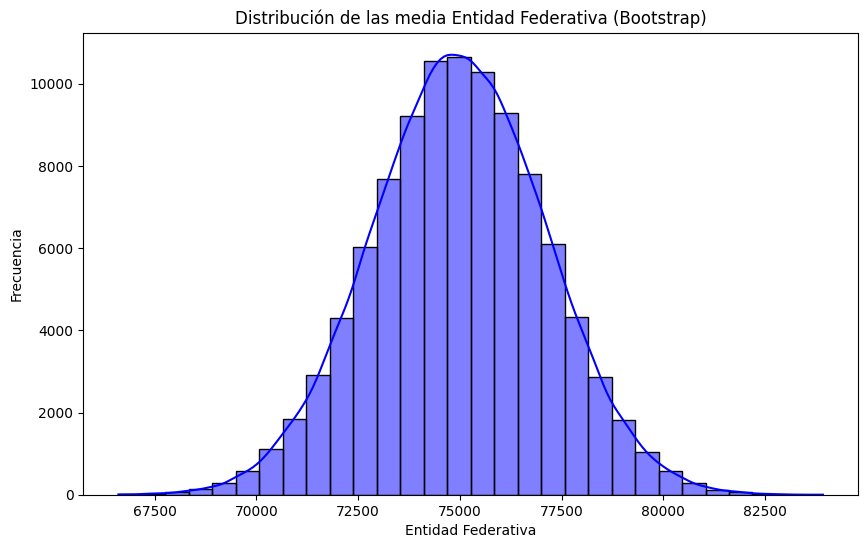

In [30]:
medias = []

for _ in range(100_000):
    muestra_bootstrap = df['ENTIDAD_FEDERATIVA'].sample(n=50, replace=True)
    media_bootstrap = muestra_bootstrap.mean()
    medias.append(media_bootstrap)

# Convertimos las medias a una Serie de pandas
serie_medias = pd.Series(medias)

# Visualizar la distribución de las medias
plt.figure(figsize=(10, 6))
sns.histplot(serie_medias, kde=True, bins=30, color='blue')
plt.title('Distribución de las media Entidad Federativa (Bootstrap)')
plt.xlabel('Entidad Federativa')
plt.ylabel('Frecuencia')
plt.show()

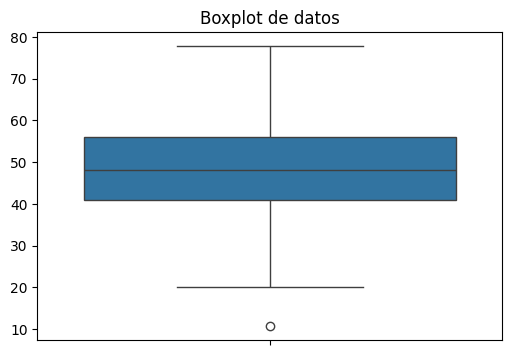

In [33]:
np.random.seed(42)
data = np.random.normal(loc=50, scale=15, size=100)
plt.figure(figsize=(6, 4))
sns.boxplot(y=data)
plt.title("Boxplot de datos")
plt.show()

In [31]:
asimetria = serie_medias.skew()
curtosis = serie_medias.kurtosis()
print(f"Asimetría de la distribución: {asimetria:.2f}")
print(f"Curtosis de la distribución: {curtosis:.2f}")

Asimetría de la distribución: -0.01
Curtosis de la distribución: -0.02
